# Elementi teorici di Machine Learning 

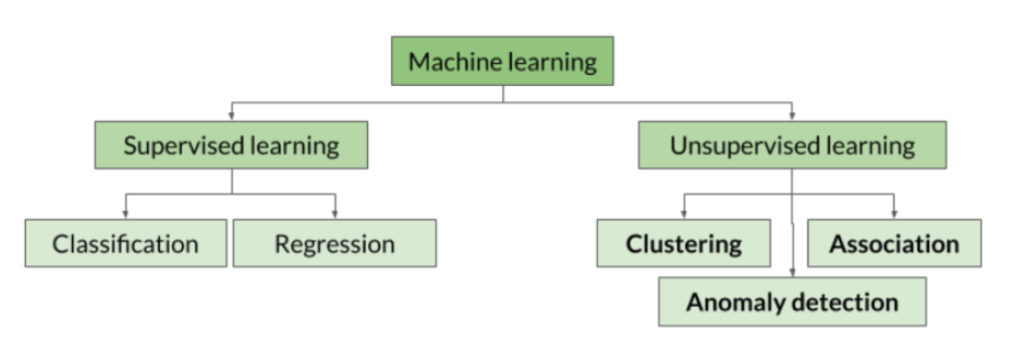

Nel diagramma sopra riportato è possibile osservare i diversi modelli le le diverse task che si possono svolgere attraverso algoritmi di machine learning. A livello prettamente teorico, una volta che un modello di machine learning è stato addestrato, bisogna valutarne le performance, se queste dovessero risultare particolarmente deludenti, sarà necessario andare a potenziare il modello. Esistono tre tecniche principali per potenziare un modello, ovvero:
- **Dimensionality reduction** ovvero ridurre il numero delle features, questo perchè alcune features possono essere irrilevanti;
- **Hyperparameter tuning** riguarda il settare nel miglior modo possibile gli hyperparameter. Spesso si prendono diversi valori e si addestra il modello su quegli specifici iperparametri. Verranno scelti poi gli hyperparameters che porteranno ai miglior risultati;
- **Ensamble methods** combinare diversi modelli per ottenere il miglior risultato.

### 1) Underfitting e overfitting

Il modello è soggetto a underfitting dei dati di addestramento quando ha prestazioni scarse sui dati di addestramento. Questo avviene perché il modello non è in grado di acquisire il rapporto tra gli esempi di input (spesso chiamati X) e i valori target (spesso chiamati Y).Questo succede quando costruiamo un modello decision tree con troppi livelli. In qeusto caso le foglie dell'ultimo livello avranno pochissimi dati di traing, ma è su questi dati che poi il modello proverà a fittare i dati del testing set. Quindi l' **overfitting** si può definire quando un modello corrisponde quasi perfettamente ai dati di addestramento, ma funziona male nella convalida dei nuovi dati. D'altra parte, se rendiamo il nostro albero molto basso, non identificherà correttamente i gruppi. Quando un modello non riesce a catturare importanti distinzioni e modelli nei dati, quindi funziona male anche nei dati di addestramento, si parla di **underfitting**.

In un modello di decision tree l'argomento *max_leaf_nodes* provede in modo abbastanza sensibile a controllare l'underfitting e l'overfitting.

## 2) ERRORE MEDIO ASSOLUTO

In [ ]:
#predicted_home_prices contiene i valori predetti attraverso il modello 
melbourne_model. 

from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)


#### 2.1) Funzione di training di un modello random forest con valutazione attraverso l'errore medio assoluto

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)


## 3) SPLIT DEL TRAINING E DEL TEST SET

In [ ]:
# il modello va a separare il trainingset e il validetion set (testing set) per le features e per i target values. Quindi avremo training e validation set sia per X (regressori) che per y (variabile dipendente)

from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)


## 4) MISSING VALUES

Molti modelli di Machine Learning, inclusi quelli di scikit-lear, danno errore se vengono costruiti su dataset che contengono dati mancanti. Per questo motivo nella fase di analisi dei dati è molto importante gestire i dati mancanti. Esistono 3 approcci per risolvere il problema dei dati mancanti:
#### 4.1) Eliminare le features coi dati mancanti

In [ ]:
#in questo caso vengolo eliminate le colonne ovvero le features che presentano dei dati mancanti
# Get names of columns with missing values
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]

# Drop columns in training and validation data
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)

print("MAE from Approach 1 (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid)) #scre_dataset è una funzione precedentemente costruita per calcolare l'errore medio assoluto del modello


#### 4.2) Sostituire i dati mancanti con il valore medio della feature

In [ ]:
"""in questo secondo metodo ci si serve di SimpleImputer per sostituire i valori mancanti con la media della singola feature
il SimpleImputer è uno strumento che funge appositamente a questa funzione di sostituzione con la media.
Ma il valore medio non è l'unico modo con cui si può sostituire il dato mancante. Si possono usare ad esempio le seguenti alternative:"""


# Imputing with mean value
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')

# Imputing with median value
imputer = SimpleImputer(missing_values=np.NaN, strategy='median')

# Imputing with most frequent / mode value
imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')

# Imputing with constant value; The command below replaces the missing
# value with constant value such as 80
imputer = SimpleImputer(missing_values=np.NaN, strategy='constant', fill_value=80)

from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

print("MAE from Approach 2 (Imputation):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))


#### 4.3) Sostituire i dati mancanti con il valore medio e inserire una nuova feature booleane con True nelle righe dove c'erano i dati mancanti

In [ ]:
# Make copy to avoid changing original data (when imputing)
X_train_plus = X_train.copy()
X_valid_plus = X_valid.copy()

# Make new columns indicating what will be imputed
for col in cols_with_missing:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()

# Imputation
my_imputer = SimpleImputer()
imputed_X_train_plus = pd.DataFrame(my_imputer.fit_transform(X_train_plus))
imputed_X_valid_plus = pd.DataFrame(my_imputer.transform(X_valid_plus))

# Imputation removed column names; put them back
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_valid_plus.columns = X_valid_plus.columns

print("MAE from Approach 3 (An Extension to Imputation):")
print(score_dataset(imputed_X_train_plus, imputed_X_valid_plus, y_train, y_valid))


## 5) VARIABILI CATEGORICHE

Una varibile categorica è una variabile che pyò assumere solo un limitato numero di variabili. Un esempio potrebbe riguardare il risultato di un sondaggio sul gradimento di un determinato servizio: in questo caso gli intervistati potrebbero rispondere "molto soddisfatto", "mediamente soddisfatto" o "per niente soddisfatto". Chiaramente risulta impossibile andare ad addestrare un modello di ML su dati di questo tipo, quindi è importante trattare queste variabili andadole ad elaborarle e renderle più utilizzabili. Esistono tre approcci per trasformare queste variabili:

In [ ]:
# come visualizzare le colonne con variabili categoriche al suo interno
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)


#### 5.1) Eliminare le colonne con variabili categoriche
questo approccio ovviamente funziona solo se tali colonne non contengano informazioni importanti

#### 5.2) Ordinal Encoding
Questo approccio presuppone un ordinamento delle categorie: 
"Mai" (0) < "Raramente" (1) < "Quasi tutti i giorni" (2) < "Ogni giorno" (3).
Questa ipotesi ha senso in questo esempio, perché esiste un'indiscutibile classificazione per le categorie. Non tutte le variabili categoriche hanno un chiaro ordinamento nei valori. Per i modelli tree-based (come alberi decisionali e foreste casuali), ci si aspetta che l'ordianl encoding funzioni bene con le variabili ordinali.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Make copy to avoid changing original data 
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()

# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
label_X_train[object_cols] = ordinal_encoder.fit_transform(X_train[object_cols])
label_X_valid[object_cols] = ordinal_encoder.transform(X_valid[object_cols])

""" Dove le object_cols, ovvero le colonne con varibili categoriche, vengono ottenute tramite: 
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]
"""

E' in oltre stra mega importante capire quanti sono i valori unici che può assumere una variabile categorica. Questo vuol dire che nel caso di prima sul livello di gradimento di un servizio (molto soddisfatto", "mediamente soddisfatto" o "per niente soddisfatto"), i valori unici di quella variabile categorica sono 3. 
In Data Science ci si riferisce al numero di valori unici di una variabile categorica come **cardinalità**. Perciò la variabile categorica "livello di gradimento" ha una cardinalità pari a 2.

#### 5.3) One-Hot Encoding

One-hot encoding crea nuove colonne che indicano la presenza (o l'assenza) di ognuno dei possibili valori che la variabile categorica può assumere.

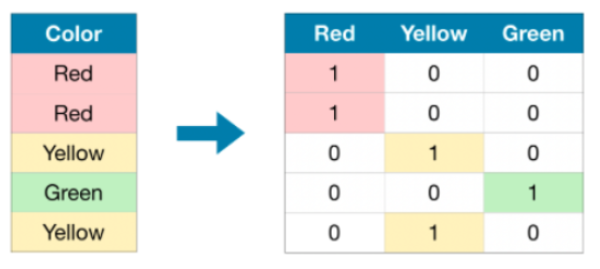

Contrariamente all'ordianl encoding, il one-hot encoding non presuppone un ordinamento delle categorie. Pertanto, puoi aspettarti che questo approccio funzioni particolarmente bene se non c'è un ordine chiaro nei dati categorici (ad esempio, "Rosso" non è né più né meno di "Giallo"). Ci riferiamo a variabili categoriali prive di un rango intrinseco come variabili nominali.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)


Per dataset di grandi dimensioni con molte righe, il One-Hot encoder può espandere notevolmente le dimensioni del set di dati. Per questo motivo, in generesi codificano solo colonne con una cardinalità relativamente bassa. Quindi, le colonne ad alta cardinalità o vengono codificate con l'Ordinal Encoder, oppure possono essere eliminate.

#### Esiste un modo per trasformare le variabili categoriche tramite dummies

In [ ]:
import pandas as pd

data = pd.get_dummies(data)

## 6) LE PIPELINE

Nel software engeneering, una pipeline è costituita da una catena di elementi e di elaborazionI, disposti in modo tale che l'output di ciascun elemento sia l'input del successivo; il nome deriva per analogia dal tubo fisico (pipeline = tubatura). Di solito viene fornita una certa quantità di buffering tra elementi consecutivi. Le informazioni che fluiscono in queste pipeline sono spesso un flusso di record, byte o bit e gli elementi di una pipeline possono essere chiamati filtri; questo è anche chiamato modello di progettazione di tubi e filtri. Il collegamento di elementi in una pipeline è analogo alla composizione delle funzioni.

In senso stretto, una pipeline è lineare e unidirezionale, anche se a volte il termine viene applicato a flussi più generali. Ad esempio, una pipeline principalmente unidirezionale può avere alcune comunicazioni nell'altra direzione, note come canale di ritorno o backchannel, oppure una pipeline può essere completamente bidirezionale. I flussi con topologie ad albero unidirezionale e a grafo aciclico diretto si comportano in modo simile alle pipeline (lineari) - la mancanza di cicli le rende semplici - e quindi possono essere genericamente definiti "pipeline".

Molti data scientist mettono insieme modelli senza pipeline, ma le pipeline hanno alcuni vantaggi importanti. Questi includono:

**Codice più pulito**: la contabilità dei dati in ogni fase della pre-elaborazione può diventare disordinata. Con una pipeline, non sarà necessario tenere traccia manualmente dei dati di addestramento e convalida in ogni fase.

**Meno bug**: ci sono meno possibilità di applicare erroneamente un passaggio o dimenticare un passaggio di pre-elaborazione.

**Più facile da produrre**: può essere sorprendentemente difficile trasferire un modello da un prototipo a qualcosa di distribuibile su larga scala. Non entreremo qui nelle molte preoccupazioni correlate, ma i gasdotti possono aiutare.

**Altre opzioni per la convalida del modello**: vedrai un esempio nel prossimo tutorial, che copre la convalida incrociata.

Ecco un esempio di come può essere condotto un progetto di machine learning e come in tale progetto si inserisce la Pipeline

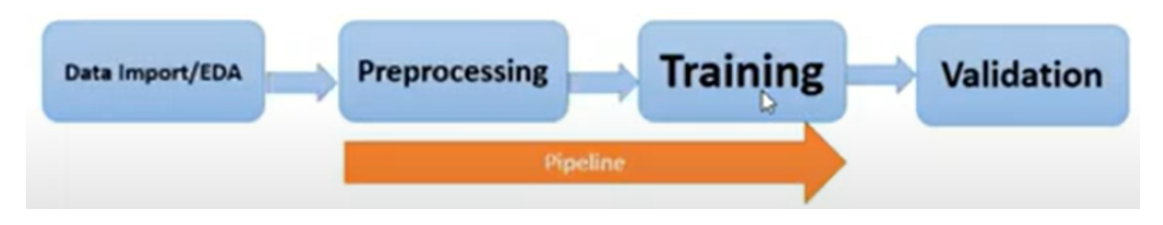

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

### Primo esempio di Pipeline ###
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define model
model = RandomForestRegressor(n_estimators=100, random_state=0)

### Secondo esempio di Pipeline ###
# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

# Preprocessing of training data, fit model 
clf.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = clf.predict(X_valid)

print('MAE:', mean_absolute_error(y_valid, preds))

## 7) CROSS VALIDATION

Durante un progetto di machine learning ci si trova ad affrontare scelte su quali variabili predittive utilizzare, quali tipi di modelli utilizzare, quali argomenti fornire a tali modelli, ecc. Immaginiamo di avere un set di dati con 5000 righe. In genere manterrai circa il 20% dei dati come testing set ovvero 1000 righe. Ma questo lascia qualche possibilità casuale nel determinare i punteggi del modello. In altre parole, un modello potrebbe funzionare bene su un set di 1000 righe, anche se potrebbe essere impreciso su 1000 righe diverse.

In generale, maggiore è il set di convalida, minore è la casualità (nota anche come "rumore") nella nostra misura della qualità del modello e più affidabile sarà. Sfortunatamente, possiamo ottenere un set di convalida di grandi dimensioni solo rimuovendo le righe dai nostri dati di training e set di dati di addestramento più piccoli significano modelli peggiori! La soluzione a questa tipologia di modelli è la **cross-validation**.

Per **CROSS VALIDATION** a volte chiamata *rotation estimation* o *out of sample testing*, è una tecnica di model validation  per valutare come i risultati di un'analisi statistica si generalizzerà indipendentemente dal dataset. La cross validation è un metodo di ricampionamento che utilizza parti diverse dei dati per testare e addestrare un modello su iterazioni diverse. Viene utilizzato principalmente in contesti in cui l'obiettivo è la previsione e si desidera stimare l'accuratezza delle prestazioni pratiche di un modello predittivo. 

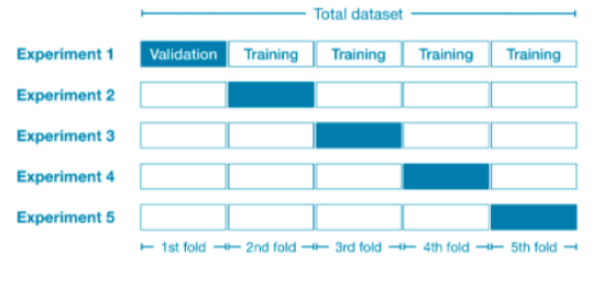

Il cross validation permette di stiamre in maniera più precisa il livello di qualità del modello, il problema è che necessita di parecchio tempo per essere eseguito, questo perchè dovrà eseguire più volte il modello.
Questo trade off chiaramente viene meno se si ha a disposizione piccoli dataset, dove una maggiore richiesta computazionale non è un grosso problema. Ma quando si ha a che fare con grandi dataset, usare la cross validation potrebbe richiedere molto tempo e non necessariamente potrebbe portare a risultati migliori. Questo perchè con grandi dataset il testing set è generalmente già abbastanza grande ed eterogeneo.

Non c'è un livello soglia per cui sia facile distinguere un dataset grande da un dataset piccolo, ma in linea generale possiamo dire che se viene impiegato meno di un paio di minuti per generare il modello, allora potrebbe essere utile eseguire la cross validation.

In [ ]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

""" my_pipeline è una pipeline precedentemente definita"""

## 8) Extreame Gradient Boosting

**Gradient Boosting** è un algoritmo di machine learning utilizzato per risolvere i problemi di classificazione e regressione. Funziona creando un insieme di modelli di predizione deboli e poi combinandoli in modo da ottenere un modello di predizione più accurato. Ciascun modello debole viene allenato sui dati e poi viene aggiunto all'insieme di modelli esistente, in modo che il modello finale sia una combinazione di tutti i modelli deboli.
Il gradient Boosting è particolarmente efficace perché utilizza un processo di "boosting" per aumentare l'accuratezza del modello finale. Ciò significa che ogni modello debole viene utilizzato per correggere gli errori commessi dai modelli precedenti, il che porta a una maggiore accuratezza complessiva. Inoltre, il gradient Boosting utilizza una funzione di perdita per ottimizzare le prestazioni del modello, il che significa che l'algoritmo può adattarsi a diverse tipologie di dati e problemi di predizione.

In sintesi, il gradient Boosting è un algoritmo di machine learning efficace perché utilizza un processo di boosting per aumentare l'accuratezza del modello finale e utilizza una funzione di perdita per ottimizzare le prestazioni del modello.

Nello specifico il modello funziona nel seguente modo: si inizia con l'inizializzazione di un primo modello, anche piuttosto semplice, le cui previsioni possono anche essere anche non molto accurate. 

Dopodichè si inizia il seguente ciclo:


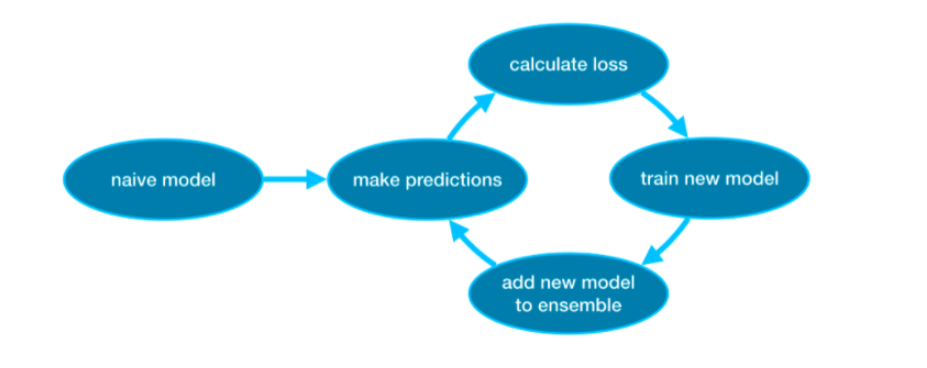

1. si addestra il modello iniziale sui dati di training disponibili, estrapolando e raccogliendo le previsioni.
2. Queste previsioni vengono utilizzate per calcolare una loss-function (come può essere il RMSE ad esempio)
3. Dopodichè, attraverso la loss function, si addestra un nuovo modello le cui previsioni verranno aggiunte a quelle dei modelli precedenti. Sostanzialmente si vuole andare a determinare i parametri del modello in modo tale che le previsioni del modello possano minimizzare la loss function. 
(Side note: The "gradient" in "gradient boosting" refers to the fact that we'll use gradient descent on the loss function to determine the parameters in this new model.)
4. si aggiungono le previsioni del nuovo modello a quelle precedenti e si ripete il ciclo

In [ ]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(X_train, y_train)

Chiaramente anche per modelli di tipo gradient boosting è possibile fare il Fine tuning degli hyperparameter

## 9) Data Leakage

Per Data leakage (letteralmente perdita di dati) si intende qulla situazione in cui i dati di training contengono informazioni che non sono saranno disponibili al tempo in cui si vuole fare le previsioni. Questo porta ad avere una situazione in cui il modello ha elevata precisione sui dati di training ma eisulta altamente inaccurato per fare previsioni.